# Tutorial: Arxiv HEP-TH Citation Network Data Handling

This tutorial demonstrates two approaches to accessing the Arxiv HEP-TH citation network dataset:
1. **Automated Download and Extraction**
2. **Manual Upload Instructions**

The dataset represents a citation graph for 27,770 papers (with 352,807 directed edges) from the high energy physics theory section on arXiv, covering January 1993 to April 2003. It was originally released as part of the 2003 KDD Cup.


---
## 1. Automated Download and Extraction

In this approach we will:
- **Mount Google Drive.**
- **Create or navigate to a Data subfolder under Colab Notebooks.**
- **Download the compressed file using `curl`.**
- **Extract the `.gz` file using `gunzip`.**
- **Verify and load the dataset.**


In [1]:
import utils

url = "https://snap.stanford.edu/data/cit-HepTh.txt.gz"
file_path = utils.download_and_extract_data(zip_url=url, filetype="csv.gz")

Not running in Colab. Using local folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
Using data folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
ZIP file already exists.
Extraction complete.


## Dataset Information

**High-energy Physics Theory Citation Network**

- **Description:**  
  The dataset represents the citation network among 27,770 papers in the arXiv HEP-TH category, featuring 352,807 directed edges. If paper *i* cites paper *j*, the graph contains a directed edge from *i* to *j*. Citations involving papers outside the dataset are not included. The data spans from January 1993 to April 2003 and was originally released as part of the 2003 KDD Cup.

- **Dataset Statistics:**
  - **Nodes:** 27,770
  - **Edges:** 352,807
  - **Nodes in largest WCC:** 27,400 (0.987)
  - **Edges in largest WCC:** 352,542 (0.999)
  - **Nodes in largest SCC:** 7,464 (0.269)
  - **Edges in largest SCC:** 116,268 (0.330)
  - **Average clustering coefficient:** 0.3120
  - **Number of triangles:** 1,478,735
  - **Fraction of closed triangles:** 0.04331
  - **Diameter (longest shortest path):** 13
  - **90-percentile effective diameter:** 5.3

- **Citation Sources:**
  - *J. Leskovec, J. Kleinberg and C. Faloutsos. Graphs over Time: Densification Laws, Shrinking Diameters and Possible Explanations. ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD), 2005.*
  - *J. Gehrke, P. Ginsparg, J. M. Kleinberg. Overview of the 2003 KDD Cup. SIGKDD Explorations 5(2): 149-151, 2003.*

- **File Details:**
  - **File:** `cit-HepTh.txt.gz`  
    **Description:** Compressed file containing the paper citation network.  
    **Download link:** [cit-HepTh.txt.gz](https://snap.stanford.edu/data/cit-HepTh.txt.gz)

**Example Entry:**

_Paper: hep-th/0002031_  
_From: Maulik K. Parikh_  
_Date: Fri, 4 Feb 2000 17:04:51 GMT (10kb)_  
_Title: Confinement and the AdS/CFT Correspondence_  
_Authors: D. S. Berman and Maulik K. Parikh_  
_Comments: 12 pages, 1 figure, RevTeX_  
_Report-no: SPIN-1999/25, UG-1999/42_  
_Journal-ref: Phys.Lett. B483 (2000) 271-276_  

_We study the thermodynamics of the confined and unconfined phases of superconformal Yang-Mills in finite volume and at large N using the AdS/CFT correspondence. We discuss the necessary conditions for a smooth phase crossover and obtain an N-dependent curve for the phase boundary._


## Section 1: Introduction to Graph Embeddings in Machine Learning

### Objectives
- Understand the concept and purpose of graph embeddings.
- Recognize the significance of embeddings in representing complex network data.

### Introduction
Graph embeddings provide a way to convert high-dimensional graph data into a low-dimensional vector space. This section introduces the concept of graph embeddings and explains how they simplify the analysis of complex networks, such as the High-energy Physics Theory citation network.


### Key Concepts
- **Graph Embeddings:** Techniques to represent nodes, edges, or entire graphs as vectors in a lower-dimensional space.
- **Preservation of Structure:** Ensuring that the essential structural information of the original graph is maintained in the embedded space.

![graph embedding](figures/graph_embeddings.png)

### Code Examples
Below is an example of how to load the citation network dataset and visualize its basic graph properties, such as the degree distribution.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the citation network dataset as a directed graph.
# The file 'cit-HepTh.txt' should be present in the current working directory.
G = nx.read_edgelist(
    file_path,
    create_using=nx.DiGraph(),
    nodetype=int,
    comments="#",
)

utils.print_graph_info(G)

Graph is directed and unweighted.
Number of nodes:	 27,770
Number of edges:	352,807
Density:		0.000


<Axes: title={'center': 'Log-Log Degree Distribution'}, xlabel='Degree', ylabel='Count'>

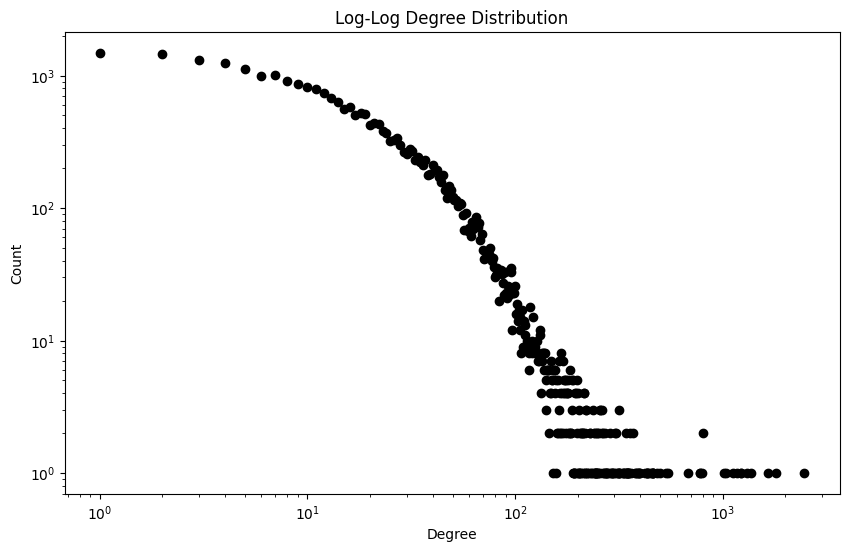

In [3]:
# Compute the degree distribution (using total degree: in-degree + out-degree).
degrees = [G.degree(n) for n in G.nodes()]

fig, ax = plt.subplots(figsize=(10, 6))
utils.log_log_plot(degrees, ax=ax)

### Observations & Explanations
- The citation network is sparse, with many nodes having a low degree and only a few nodes acting as hubs with very high degrees.
- The degree distribution visualization reveals how connectivity is distributed across the network, providing insights into potential influential nodes.
- These structural insights motivate the need for graph embeddings, which can capture and preserve the nuances of the graph’s connectivity in a lower-dimensional space.


### Quiz
1. What is a graph embedding and why is it important in machine learning?  
2. How does the structure of the high-energy physics citation network motivate the use of graph embeddings?


### Practical Activities
- **Activity 1:** Load and inspect the dataset by printing out the first few lines of the file. Look for any patterns or anomalies in the data.
- **Activity 2:** Modify the histogram parameters (e.g., change the number of bins) in the code example and observe how the visualization of the degree distribution changes.


In [4]:
# Practical Activity: Inspect the dataset by reading the first 10 lines.
with open(file_path, "r") as file:
    for i in range(10):
        print(file.readline().strip())

# Directed graph (each unordered pair of nodes is saved once): Cit-HepTh.txt
# Paper citation network of Arxiv High Energy Physics Theory category
# Nodes: 27770 Edges: 352807
# FromNodeId	ToNodeId
1001	9304045
1001	9308122
1001	9309097
1001	9311042
1001	9401139
1001	9404151


## Section 2: Node2Vec and DeepWalk Methods for Node Embeddings


### Objectives
- Learn how Node2Vec and DeepWalk generate node embeddings.
- Compare the methodological differences and parameter settings of both methods.


### Introduction
Random walk–based methods form the foundation of both Node2Vec and DeepWalk. These techniques simulate random walks on a graph to capture both local and global structural information. In this section, we will explore how these methods work and apply them to the High-energy Physics Theory citation network.


### Key Concepts
- **Random Walks:** The process of traversing a graph by randomly selecting the next node, which helps capture local connectivity patterns.
- **Biased vs. Uniform Walks:**  
  - *Node2Vec* uses biased random walks (via parameters `p` and `q`) to flexibly explore neighborhoods.  
  - *DeepWalk* employs uniform random walks (by setting `p` and `q` to 1), resulting in a more straightforward exploration.


## Embedding Generation

In [5]:
# RUn !  marp --server  ./

### Code Examples
Below is an example that demonstrates how to implement Node2Vec and DeepWalk on the citation network. We will generate node embeddings using both methods and visualize the results using PCA to reduce the embedding dimensions.


In [6]:
# Install the node2vec library if not already installed
!pip install --upgrade numpy gensim node2vec  # you might need to restart the kernel

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from node2vec import Node2Vec
from sklearn.decomposition import PCA

  Using cached numpy-2.2.6-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)


In [7]:
# Use a subgraph for faster execution (e.g., first 1000 nodes)
G = nx.read_edgelist(
    file_path,
    create_using=nx.DiGraph(),
    nodetype=int,
    comments="#",
)
subset_nodes = list(G.nodes())[:1000]
G_sub = G.subgraph(subset_nodes).copy()
utils.print_graph_info(G_sub)

Graph is directed and unweighted.
Number of nodes:	  1,000
Number of edges:	 12,944
Density:		0.013


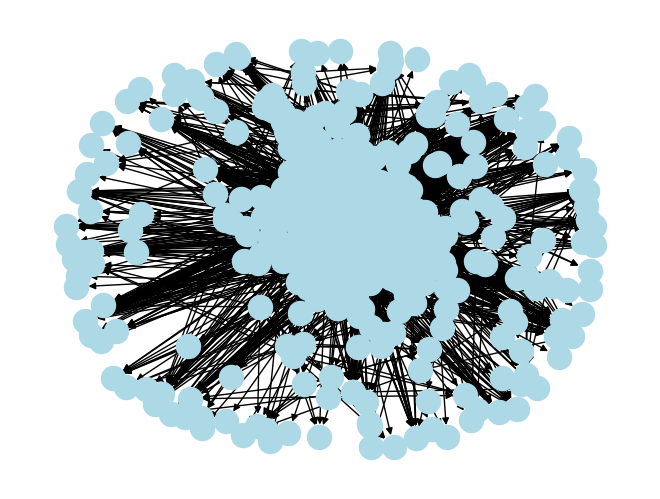

In [8]:
# 15 seconds
pos = nx.spring_layout(G_sub, seed=42, scale=0.1)
nx.draw(G_sub, pos, with_labels=False, node_color="lightblue")

In [9]:
# 30 seconds on the full graph
# ---------------------------
# Node2Vec Embedding (Biased Random Walks) with optimized parameters
#  This results in biased walks, balancing between breadth-first
# and depth-first strategies, helping capture c
# community structure and role similarity.
# ---------------------------
node2vec = Node2Vec(
    G,
    dimensions=32,
    walk_length=10,
    num_walks=20,
    p=0.5,  # p < 1: increases the likelihood of returning to the previous node (more “depth-first”).
    q=2,  # q > 1: increases the likelihood of moving to a node that is further away from the previous node (more “breadth-first”).
    workers=2,
)
model_node2vec = node2vec.fit(window=5, min_count=1)
vectors = model_node2vec.wv.vectors
print(
    f"Graph with {G.number_of_nodes()} nodes resulted in {vectors.shape[0]} vectors of size {vectors.shape[1]}"
)

Computing transition probabilities:   0%|          | 0/27770 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]


Graph with 27770 nodes resulted in 27770 vectors of size 32


In [10]:
# 30 seconds on the full graph

# ---------------------------
# DeepWalk Embedding (Uniform Random Walks) with optimized parameters
# ---------------------------
deepwalk = Node2Vec(
    G,
    dimensions=32,
    walk_length=10,
    num_walks=20,
    p=1,  # p == q == 1 - standard random walk
    q=1,
    workers=2,
)
model_deepwalk = deepwalk.fit(window=5, min_count=1)

Computing transition probabilities:   0%|          | 0/27770 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 10/10 [00:02<00:00,  4.40it/s]


The vectors we obtained are of size 32. It is very hard to visualize them in a 2D plot.  
To build some intuition, we need to **reduce the dimensionality** of the vectors. We'll use PCA and t-SNE to reduce the vectors to 2D.

* **PCA (Principal Component Analysis)** is a linear technique that identifies the directions (principal components) where the data varies the most and projects it onto those directions. This helps retain as much of the global structure as possible in a lower-dimensional space.

* **t-SNE (t-distributed Stochastic Neighbor Embedding)** is a nonlinear method that focuses on preserving **local relationships** in the data. It maps similar vectors close together in the 2D space, making it especially useful for discovering clusters or neighborhoods in high-dimensional data.

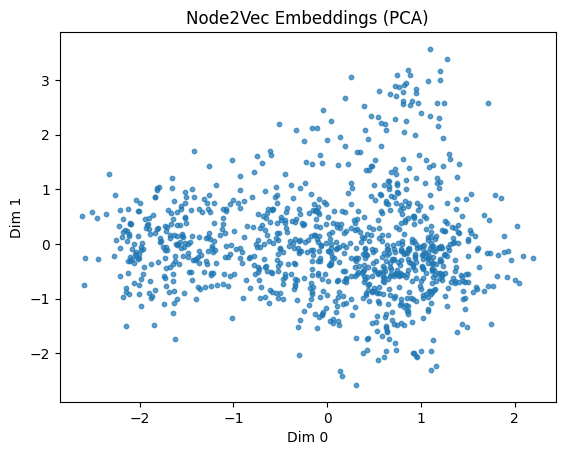

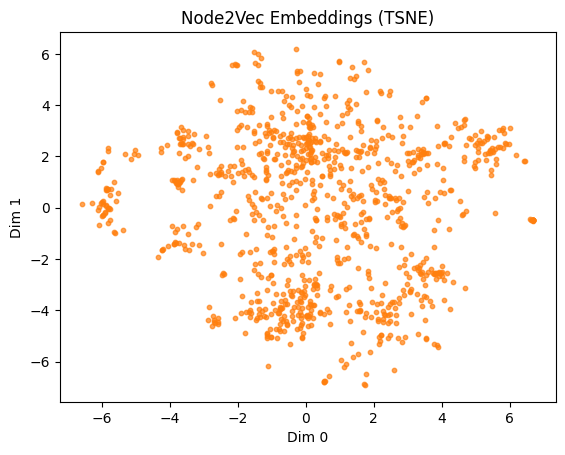

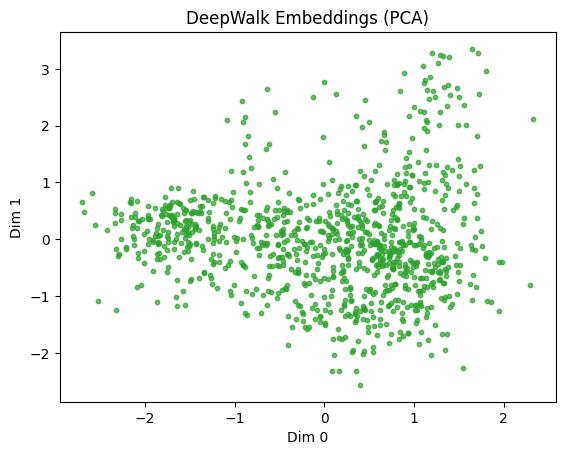

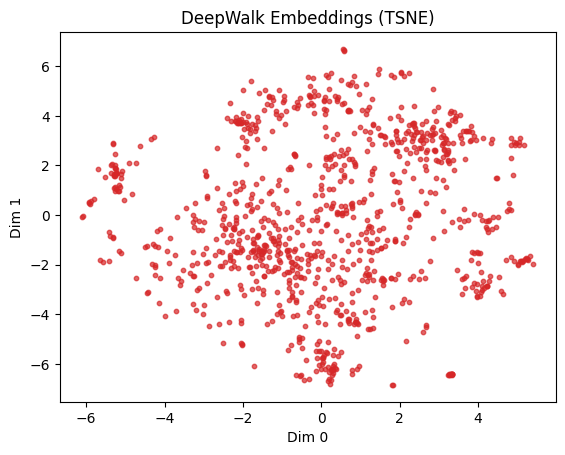

In [28]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


def plot_embedding(embeddings, title, method="pca", dim_x=0, dim_y=1, color="k"):
    reducer = (
        PCA(n_components=max(dim_x, dim_y) + 1)
        if method == "pca"
        else TSNE(n_components=max(dim_x, dim_y) + 1, perplexity=300, random_state=42)
    )
    reduced = reducer.fit_transform(embeddings)
    plt.figure()
    plt.scatter(reduced[:, dim_x], reduced[:, dim_y], s=10, alpha=0.7, color=color)
    plt.title(f"{title} ({method.upper()})")
    plt.xlabel(f"Dim {dim_x}")
    plt.ylabel(f"Dim {dim_y}")
    plt.show()


def get_embeddings(model, nodes):
    return np.array([model.wv[str(n)] for n in nodes if str(n) in model.wv])


emb_node2vec = get_embeddings(model_node2vec, G_sub.nodes())
emb_deepwalk = get_embeddings(model_deepwalk, G_sub.nodes())

plot_embedding(emb_node2vec, "Node2Vec Embeddings", method="pca", color="C0")
plot_embedding(emb_node2vec, "Node2Vec Embeddings", method="tsne", color="C1")
plot_embedding(emb_deepwalk, "DeepWalk Embeddings", method="pca", color="C2")
plot_embedding(emb_deepwalk, "DeepWalk Embeddings", method="tsne", color="C3")

In [24]:
import make_cora_graph_subset

print("Loading full Cora dataset")
fn_cora_full = make_cora_graph_subset.download_full()
G_cora = nx.read_graphml(fn_cora_full)
utils.print_graph_info(G_cora)

Loading full Cora dataset
Graph is undirected and unweighted.
Graph is disconnected.
Number of nodes:	  2,708
Number of edges:	  5,278
Density:		0.001
Full graph saved to /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data/cora_graph_full.graphml
Graph is undirected and unweighted.
Graph is disconnected.
Number of nodes:	  2,708
Number of edges:	  5,278
Density:		0.001


In [29]:
model_cora = Node2Vec(
    G_cora,
    dimensions=128,
    walk_length=10,
    num_walks=100,
    p=0.5,
    q=2,
    workers=2,
)
model_cora = model_cora.fit(window=5, min_count=1)
vectors = model_cora.wv.vectors

Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:01<00:00, 29.80it/s]


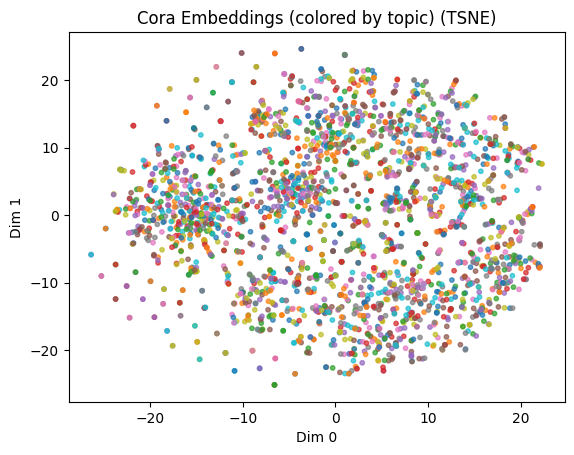

In [30]:
# t-sne of the new vectos
node_colors = [f"C{i}" for i in G_cora.nodes()]
plot_embedding(
    vectors, "Cora Embeddings (colored by topic)", method="tsne", color=node_colors
)

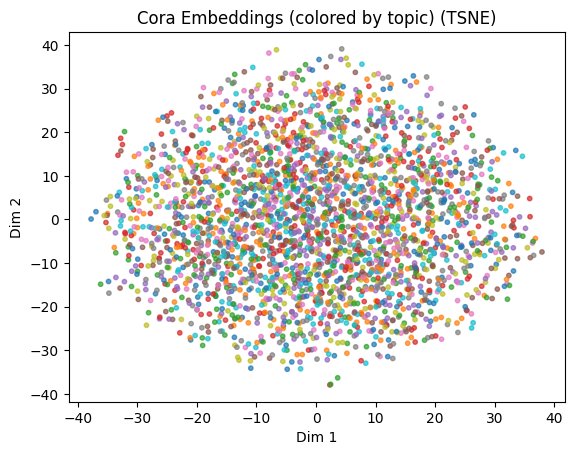

In [31]:
plot_embedding(
    vectors,
    "Cora Embeddings (colored by topic)",
    method="tsne",
    color=node_colors,
    dim_x=1,
    dim_y=2,
)

### Practical Activities
- **Activity 1:** Experiment with parameter tuning for Node2Vec. Adjust parameters such as `walk_length` and `num_walks`, and observe how the embedding visualization changes.  
- **Activity 2:** Compare the embeddings produced by Node2Vec and DeepWalk. Try setting different values for `p` and `q` in Node2Vec to see how bias affects the output. 
- **Activity 3:** Try using the different methods to embed Cora dataset and build a Random Forest classifier to predict the subject of the paper. Measure the performance of the classifier. Which method performs better?


## Patent citation network

In [59]:
url_patents = "https://snap.stanford.edu/data/cit-Patents.txt.gz"
file_path_patents = utils.download_and_extract_data(
    zip_url=url_patents, filetype="csv.gz"
)
G_patents = nx.read_edgelist(
    file_path_patents, create_using=nx.Graph(), nodetype=int, comments="#"
)
utils.print_graph_info(G_patents)

Not running in Colab. Using local folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
Using data folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
ZIP file already exists.
Extraction complete.
Graph is undirected and unweighted.
Graph is disconnected.
Number of nodes:	3,774,768
Number of edges:	16,518,948
Density:		0.000


,degree,count,percentage
0,1,667336,17.7
1,2,683660,18.1
2,4,861432,22.8
3,8,968664,25.7
4,16,480472,12.7
5,32,98233,2.6
6,64,13292,0.4
7,128,1507,0.0
8,256,144,0.0
9,512,28,0.0


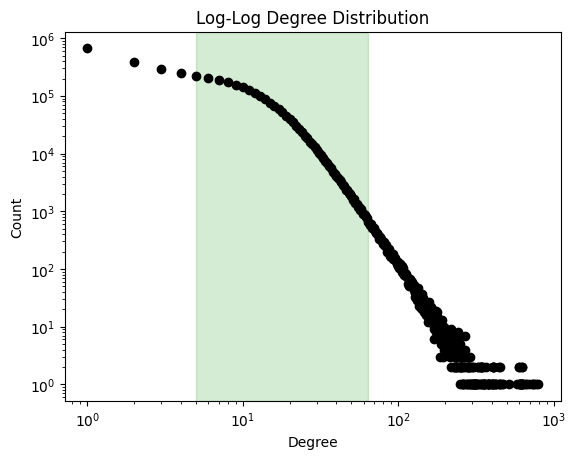

In [68]:
import pandas as pd

degrees = pd.Series([G_patents.degree(n) for n in G_patents.nodes()])
ax = utils.log_log_plot(degrees)
deg_min = 5
deg_max = 64
sel = (degrees >= deg_min) & (degrees <= deg_max)
ax.axvspan(deg_min, deg_max, alpha=0.2, color="C2")
log2degrees = np.log2(degrees).astype(int)
degree_distribution = log2degrees.value_counts().sort_index().reset_index()
degree_distribution["index"] = np.power(2, degree_distribution["index"])
degree_distribution.columns = ["degree", "count"]
degree_distribution["percentage"] = (
    degree_distribution["count"] / degree_distribution["count"].sum() * 100
).round(1)
degree_distribution

**What can we say about the degree distribution of the patent citation network**

In [ ]:
nodes_to_take = np.array(G_patents.nodes())[sel.values]
G_patents_sub = G_patents.subgraph(nodes_to_take).to_undirected()
G_patents_sub = utils.get_giant_component(G_patents_sub)
utils.print_graph_info(G_patents_sub)

1. Apply a community detection algorithm to the patent citation network. Strive to 3-8 communities.
2. Apply a node embedding method to the patent citation network.
3. Visualize PCE embeddings in 2D using t-SNE, color by community. 